In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage.morphology
import skimage.measure
import skimage.segmentation
import skimage.feature
import sklearn.preprocessing
import imageio
import glob
import cv2
from scipy.spatial import distance as dist
import pyefd
import math
import sklearn.decomposition
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse
from math import atan2, cos, sin, sqrt, pi
from sklearn.svm import *
import sklearn.feature_selection
import sklearn.metrics
import scipy.io as spio

In [27]:
# #------Rotation from OpenCV tutorial-----------
# def getOrientation(pts, img):
    
#     sz = len(pts)
#     data_pts = np.empty((sz, 2), dtype=np.float64)
#     for i in range(data_pts.shape[0]):
#         data_pts[i,0] = pts[i,0,0]
#         data_pts[i,1] = pts[i,0,1]
#     # Perform PCA analysis
#     mean = np.empty((0))
#     mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)
#     # Store the center of the object
#     cntr = (int(mean[0,0]), int(mean[0,1]))
    
    
#     cv.circle(img, cntr, 3, (255, 0, 255), 2)
#     p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
#     p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
#     angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    
#     return angle

In [28]:
# def image_preprocessing(filepath):
#     img = imageio.imread(filepath)
#     M = np.shape(img)[1]
    
#     if M == 640:
#         temp_mask = np.where(imageio.imread('masks\\small_mask.tiff')==1, True, False)
#     if M == 848:
#         temp_mask = np.where(imageio.imread('masks\\big_mask.tiff')==1, True, False)
#     img = img*temp_mask
#     # plt.imshow(img)
#     # plt.title('img')
    
#     otsu_thresh = skimage.filters.threshold_otsu(img[temp_mask])
#     img_post = np.where(img<otsu_thresh, img, 0)
#     img_post = skimage.morphology.opening(img_post, skimage.morphology.disk(10))
#     #plt.figure()
#     #plt.imshow(img_post)
#     img_mask = np.where(img_post != 0, 1, 0)
#     #img_seg = skimage.segmentation.slic(img_post, n_segments=3, compactness=0.001, sigma=0, enforce_connectivity=False, min_size_factor=0.5, mask=temp_mask)

#     # plt.figure()
#     # plt.imshow(slic_seg)
#     # plt.title('slic_seg')

#     # plt.figure()
#     # plt.imshow(slic_seg*np.where(img_post !=0, 1, 0))
#     # plt.title('modified slic')
#     #img_post = skimage.morphology.remove_small_objects(img_post, 64)
#     #img_post = skimage.morphology.opening(img_post, skimage.morphology.disk(5))
#     #img_post = skimage.morphology.closing(img_post, skimage.morphology.disk(10))
    

#     #img_mask = np.where(img_post != 0, 1, 0)
#     #otsu_thresh = skimage.filters.threshold_otsu(img_post[temp_mask])
#     #plt.figure()
#     #plt.hist(img_post[temp_mask].flatten(), bins = 1250)
#     # img_post_new = np.where(img_post<otsu_thresh, img, 0)
#     #img_mask = np.where(1200 < img <1400, 1, 0)
    
#     # plt.figure()
#     # plt.imshow(img_mask)
#     # plt.title('img_mask')
    
#     #Segment the image
#     img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
#     # plt.figure()
#     # plt.imshow(img_seg)
#     # plt.title('img_seg')

    
#     #Find largest segment
#     max_size = 0
#     layer = []
#     for i in range(1, np.max(img_seg)+1):
#         max_temp = np.sum(np.where(img_seg == i, 1, 0))
#         if max_temp > max_size:
#             max_size = max_temp
#             layer.append(i)
#     #print(len(layer))

#     largest_seg = np.where(img_seg == layer[-1], True, False)
#     #print(np.average(np.where(img_seg == layer[-1], img, 0)))
#     #print(np.average(np.where(img_seg == layer[-2], img, 0)))
#     # print(np.average(largest_seg))
#     # print(type(largest_seg[0,0]))
#     if np.average(largest_seg[temp_mask]) < 100:
#         try:
#             largest_seg = np.where(img_seg == layer[-2], True, False)
#         except:
#             pass
#     # plt.figure()
#     # plt.imshow(largest_seg)
    
#     #Get image orientation
#     cow_mask = np.where(largest_seg == True, 255, 0).astype('uint8')
#     #plt.figure()
#     #plt.imshow(cow_mask)
    
    
#     src = cow_mask
#     contours, _ = cv.findContours(src, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
#     for i, c in enumerate(contours):
#         angle = getOrientation(c, src)
#         angle = np.rad2deg(angle)-90
#         if angle < -180:
#             angle = angle+180


#     image_center = tuple(np.array(cow_mask.shape[1::-1]) / 2)
#     #rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
#     #rotated_cow = cv2.warpAffine(cow_mask, rot_mat, cow_mask.shape[1::-1], flags=cv2.INTER_LINEAR)
    

    
#     #crop the new image to be flat on top
#     for i in range(np.shape(cow_mask)[0]):
#         if np.sum(cow_mask[i, :]) != 0:
#             len_top_row = int(np.sum(cow_mask[i, :])/255)
#             break

#     crop_length = abs(int(len_top_row*np.tan(abs(np.deg2rad(angle)))))
    
    
#     #cnt, _ = cv2.findContours(rotated_cow, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) #use when rotating image
#     cnt, _ = cv2.findContours(cow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#     max_cnt = max(cnt, key=cv2.contourArea)


#     reshaped_contour = np.asarray(max_cnt).reshape((np.shape(max_cnt)[0], 2))

#     max_y_crop = np.max(reshaped_contour[::, 0])
#     min_y_crop = np.min(reshaped_contour[::, 0])


#     max_x_crop = np.max(reshaped_contour[::, 1])
#     min_x_crop = crop_length


#     # if min_x_crop > 10: #use when rotating
#     #     cropped_cow = rotated_cow[min_x_crop-10:max_x_crop+10, min_y_crop-10:max_y_crop+10]
#     # if min_x_crop < 10:
#     #     cropped_cow = rotated_cow[min_x_crop:max_x_crop+10, min_y_crop-10:max_y_crop+10]

#     if min_x_crop > 20:
#         cropped_cow = cow_mask[min_x_crop-20:max_x_crop+20, min_y_crop-20:max_y_crop+20]
#     if min_x_crop <= 20:
#         cropped_cow = cow_mask[min_x_crop:max_x_crop+20, min_y_crop-20:max_y_crop+20]
#     cnt, _ = cv2.findContours(cropped_cow, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#     max_cnt = max(cnt, key=cv2.contourArea)
#     reshaped_contour = np.asarray(max_cnt).reshape((np.shape(max_cnt)[0], 2))

#     b_cow = np.where(cropped_cow>0, 1, 0)
    
#     #Rotating the depth image to be the same as the mask
#     #depth = imageio.imread(img_names[img_num])
#     # rotated_depth = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR) #use when rotating

#     # if min_x_crop > 10:
#     #     cropped_depth = rotated_depth[min_x_crop-10:max_x_crop+10, min_y_crop-10:max_y_crop+10]
#     # if min_x_crop < 10:
#     #     cropped_depth = rotated_depth[min_x_crop:max_x_crop+10, min_y_crop-10:max_y_crop+10]
    
#     if min_x_crop > 20:
#         cropped_depth = img[min_x_crop-20:max_x_crop+20, min_y_crop-20:max_y_crop+20]
#     if min_x_crop <= 20:
#         cropped_depth = img[min_x_crop:max_x_crop+20, min_y_crop-20:max_y_crop+20]
        
#     masked_depth = (b_cow*cropped_depth).astype('uint16')

#     otsu_thresh = skimage.filters.threshold_otsu(masked_depth[np.where(b_cow !=0, True, False)])
#     depth_to_be_masked = np.where(masked_depth<(otsu_thresh+60), masked_depth, 0)
    
#     mask_to_seg = np.where(depth_to_be_masked !=0, 1, 0)
#     seg_mask = skimage.measure.label(mask_to_seg, background = 0, connectivity=2)

#     max_size = 0
#     layer = []
#     for i in range(1, np.max(seg_mask)+1):
#         max_temp = np.sum(np.where(seg_mask == i, 1, 0))
#         if max_temp > max_size:
#             max_size = max_temp
#             layer.append(i)


#     largest_seg = np.where(seg_mask == layer[-1], True, False)
#     if np.average(largest_seg[np.where(mask_to_seg==1, True, False)]) < 100:
#         try:
#             largest_seg = np.where(img_seg == layer[-2], True, False)
#         except:
#             pass
#     final_mask = np.where(largest_seg != 0, 1, 0)
#     final_depth = np.where(final_mask != 0, depth_to_be_masked, 0)




    
    
# #     plt.figure(figsize=(10,10))
# #     plt.imshow(img, cmap='gray')
# #     plt.axis('off')
# #     plt.title('Original Image')

# #     plt.figure(figsize=(10,10))
# #     plt.imshow(cow_mask, cmap='gray')
# #     plt.axis('off')
# #     plt.title('Largest Object')
    
# #     plt.figure(figsize=(10,10))
# #     plt.imshow(rotated_cow, cmap='gray')
# #     plt.axis('off')
# #     plt.title('Rotated Image')
    
# #     plt.figure(figsize=(7,7))
# #     plt.imshow(masked_depth, cmap='gray')
# #     plt.axis('off')
# #     plt.title('Processed Image')
    
    
#     return final_depth, final_mask

In [29]:
# def image_preprocessing(filepath):
#     img = imageio.imread(filepath)
#     M = np.shape(img)[1]
    
#     if M == 640:
#         temp_mask = np.where(imageio.imread('masks\\small_mask.tiff')==1, True, False)
#     if M == 848:
#         temp_mask = np.where(imageio.imread('masks\\big_mask.tiff')==1, True, False)
#     img = img*temp_mask

#     otsu_thresh = skimage.filters.threshold_otsu(img[temp_mask])
#     img_post = np.where(img<otsu_thresh, img, 0)

#     img_seg = skimage.segmentation.slic(img_post, n_segments=3, compactness=0.0001, sigma=0, enforce_connectivity=False, min_size_factor=0.5, mask=temp_mask)

#     max_size = 0
#     layer = []
#     for i in range(1, np.max(img_seg)+1):
#         max_temp = np.sum(np.where(img_seg == i, 1, 0))
#         if max_temp > max_size:
#             max_size = max_temp
#             layer.append(i)

#     otsu_thresh = skimage.filters.threshold_otsu(img[np.where(img_seg == layer[-1], True, False)])
#     img_post = np.where(img<otsu_thresh, img, 0)

#     img_binary = np.where(img_post != 0, 1, 0)
#     img_seg = skimage.measure.label(img_binary, background = 0, connectivity=2)

#     max_size = 0
#     layer = []
#     for i in range(1, np.max(img_seg)+1):
#         max_temp = np.sum(np.where(img_seg == i, 1, 0))
#         if max_temp > max_size:
#             max_size = max_temp
#             layer.append(i)

#     final_mask = np.where(img_seg==layer[-1], 1, 0)
#     final_depth = np.where(final_mask !=0, img, 0)

    # plt.figure(figsize=(10,10))
    # plt.subplot(1, 2, 1)
    # plt.imshow(final_depth)
    # plt.subplot(1, 2, 2)
    # plt.imshow(final_mask)

    # return final_depth, final_mask

In [30]:
#Testing code, most likely to work

def image_preprocessing(filepath):
    img = imageio.imread(filepath)
    background = imageio.imread("masks\\background.tif")
    img = background - img

    otsu_thresh = skimage.filters.threshold_otsu(img)
    img_post = np.where(img<otsu_thresh, img, 0)

    img_post = np.where(img_post>600, img, 0)

    img_mask = np.where(img_post != 0, 1, 0)
    img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
    assert( img_seg.max() != 0 )
    mask = img_seg == np.argmax(np.bincount(img_seg.flat)[1:])+1

    depth_img = np.where(mask != 0, img, 0)

    return depth_img, mask

In [6]:
# folder_names = glob.glob('BCS_aligned_sorted\\*\\*')
# for cow in folder_names:
#     cow_img_names = glob.glob(cow+'\\*')

#     filenames = []
#     for image in cow_img_names:
#         if image.endswith('_D.tif'):
#             filenames.append(image)

#     num_img_per_axis = int(np.sqrt(len(filenames)))
#     plt.figure(figsize=(30,20))
#     j = 1
#     for i in range(0, len(filenames), num_img_per_axis):
#         try:
#             plt.subplot(num_img_per_axis, num_img_per_axis, j)
#             _, final_mask = image_preprocessing(filenames[i])
#             plt.imshow(final_mask)
#             plt.title(filenames[i])
#             j+=1
#         except:
#             pass

In [7]:
img_num = 10
filenames_temp = glob.glob('BCS_aligned_sorted\\3\\*\\*')

temp_mask = imageio.imread('masks\\big_mask.tiff')


filenames = []
filenames_rgb = []
for image in filenames_temp:
    if image.endswith('_D.tif'):
        filenames.append(image)
    if image.endswith('_C.tif'):
        filenames_rgb.append(image)

img = imageio.imread(filenames[img_num])
img_rgb = imageio.imread(filenames_rgb[img_num])

# test_img_name = 'BCS_sorted\\6\\Cow_18\\144'
# img = imageio.imread(test_img_name+'_D.tif')
# img_rgb = imageio.imread(test_img_name+'_C.tif')
# masked_depth, mask = image_preprocessing(test_img_name+'_D.tif')

final_depth, final_mask = image_preprocessing(filenames[img_num])

Text(0.5, 1.0, 'Mask')

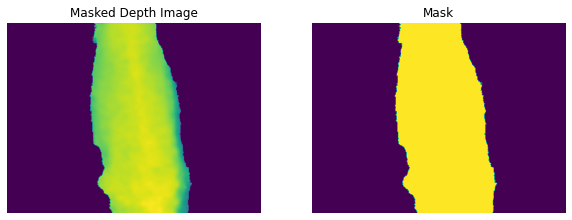

In [8]:
img_num = 400
filenames_temp = glob.glob('BCS_aligned_sorted\\3\\*\\*')

# temp_mask = imageio.imread('masks\\big_mask.tiff')


filenames = []
filenames_rgb = []
for image in filenames_temp:
    if image.endswith('_D.tif'):
        filenames.append(image)
    if image.endswith('_C.tif'):
        filenames_rgb.append(image)

img = imageio.imread(filenames[img_num])
img_rgb = imageio.imread(filenames_rgb[img_num])

# test_img_name = 'BCS_sorted\\6\\Cow_18\\144'
# img = imageio.imread(test_img_name+'_D.tif')
# img_rgb = imageio.imread(test_img_name+'_C.tif')
# masked_depth, mask = image_preprocessing(test_img_name+'_D.tif')


masked_depth, mask = image_preprocessing(filenames[img_num])


# plt.figure()
# img_rgb[:, :, 0] = img_rgb[:, :, 0]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
# img_rgb[:, :, 1] = img_rgb[:, :, 1]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
# img_rgb[:, :, 2] = img_rgb[:, :, 2]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
# plt.imshow(img_rgb)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(masked_depth)
plt.axis('off')
plt.title('Masked Depth Image')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Mask')

[ 38688654.1313281   32490115.00816289  27620221.26780812
  22117942.39799448  17115229.44036045  13587253.8888794
  11216702.43622617   7220850.89988015   3556208.02561525
    134664.04939116  -2767253.11564913  -5975889.24233609
  -8441768.43744825 -10541373.57361372 -12351773.44234377
 -13690615.92459202 -14771340.32916861 -15956612.1403507
 -16827919.41933214 -17456259.77234908 -17992995.05719877
 -18338427.6952954  -18635613.39596846] ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 'PCA_22']
(23,)


Text(0.5, 1.0, 'Kernel PCA')

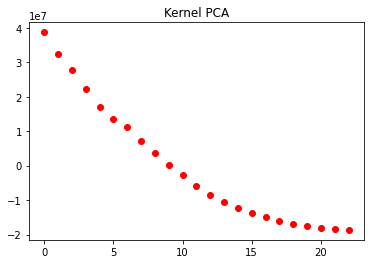

In [9]:
#----------------------Getting Kernel PCA---------------------------------
def extract_kernel_PCA(mask):
    B=skimage.measure.find_contours(mask,0.5,'high')[0]
    #print(np.shape(B))
    factor = int(np.shape(B)[0]/23)
    rem = np.shape(B)[0]%factor
    len_B = np.shape(B)[0]
    
    B_23 = np.zeros((23, 2))
    #print(B)
    #print(B_23)
    #print(np.shape(B_23))
    Big_B_0 = B[0:(len_B-rem):factor, 0]
    Big_B_1 = B[0:(len_B-rem):factor, 1]
    if len(Big_B_0) > 23:
        Big_B_0 = Big_B_0[0:23]
        Big_B_1 = Big_B_1[0:23]


    #B_23[:, 0] = B[0:(len_B-rem):factor, 0]
    #B_23[:, 1] = B[0:(len_B-rem):factor, 1]
    B_23[:, 0] = Big_B_0
    B_23[:, 1] = Big_B_1
    #print(B_23)
    kpca = sklearn.decomposition.KernelPCA(n_components = 1, kernel = 'poly')
    f = kpca.fit_transform(B_23).T[0]
    fnames = []
    for i in range(0, 23):
        fnames.append(f'PCA_{i}')

    
    return f, fnames

f, fnames = extract_kernel_PCA(mask)
print(f, fnames)
print(np.shape(f))

plt.figure()
plt.plot(f, 'ro')
plt.title('Kernel PCA')

Text(0.5, 1.0, 'Fourier Descriptors')

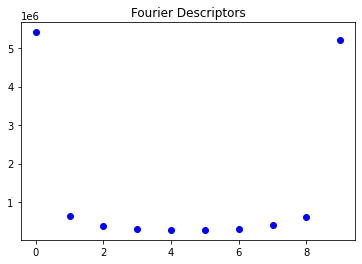

In [10]:
#------------------------Getting fourier descriptors-----------------------

def extract_boundary_features(mask):
  f = np.arange(0, 10)
  fnames = []
  fnames.append('Fourier_desc_a0')
  fnames.append('Fourier_desc_a1')
  fnames.append('Fourier_desc_a2')
  fnames.append('Fourier_desc_a3')
  fnames.append('Fourier_desc_a4')
  fnames.append('Fourier_desc_a5')
  fnames.append('Fourier_desc_a6')
  fnames.append('Fourier_desc_a7')
  fnames.append('Fourier_desc_a8')
  fnames.append('Fourier_desc_a9')

  B=skimage.measure.find_contours(mask,0.5,'high')[0]

  s = np.zeros(np.shape(B)[0], dtype=complex)
  for k in range(np.shape(B)[0]):
    s[k] = float(B[k][0]) + float(B[k][1])*1j
  
  S = scipy.fft.fft(s, n=10000)
  # print(s[1])
  # print(type(s[1]))
  for k in range(0,10):
    f[k] = np.abs(S[k*1000:(k+1)*1000].sum())
  return f, fnames


FD, fnames = extract_boundary_features(mask)

plt.figure()
plt.plot(FD, 'bo')
plt.title('Fourier Descriptors')

[2.22530170e-01 2.27430917e-02 1.43183731e-04 1.82404974e-05
 8.58507275e-10 2.40854093e-06 3.63225972e-10]


Text(0.5, 1.0, 'Hu Moments')

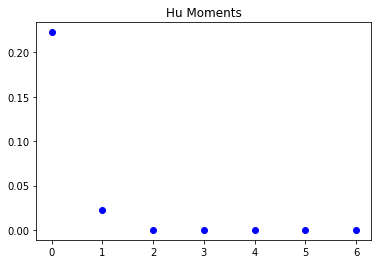

In [11]:
#----Hu Moments--------
def extract_hu_moments(mask):
    props = skimage.measure.regionprops(np.where(mask>0, 1, 0), cache=True)
    fnames = ['phi1', 'phi2', 'phi3', 'phi4', 'phi5', 'phi6', 'phi7']
    f = props[0].moments_hu
    return f, fnames


f, fnames = extract_hu_moments(mask)
print(f)

plt.figure()
plt.plot(f, 'bo')
plt.title('Hu Moments')

In [12]:
def regionprops_features(mask):
  props = skimage.measure.regionprops(mask.astype(int))
  fnames = ['area', 'convex_area', 'eccentricity','equivalent_diameter', 'euler_number', 'extent', 'filled_area','major_axis_length', 'minor_axis_length', 'perimeter', 'solidity']
  f = [props[0]['area'], props[0]['convex_area'], props[0]['eccentricity'], props[0]['equivalent_diameter'], props[0]['euler_number'], props[0]['extent'], props[0]['filled_area'],
       props[0]['major_axis_length'], props[0]['minor_axis_length'], props[0]['perimeter'], props[0]['solidity']]
  return f, fnames

f, fnames = regionprops_features(mask)
print(f, fnames)

[97246, 103303, 0.8988269827796909, 351.87704211459385, 1, 0.788310635538262, 97246, 538.9297259481016, 236.21484471945834, 1540.210244842766, 0.9413666592451333] ['area', 'convex_area', 'eccentricity', 'equivalent_diameter', 'euler_number', 'extent', 'filled_area', 'major_axis_length', 'minor_axis_length', 'perimeter', 'solidity']


(array([319, 324, 349, 354, 357, 358, 364, 432], dtype=int64),)


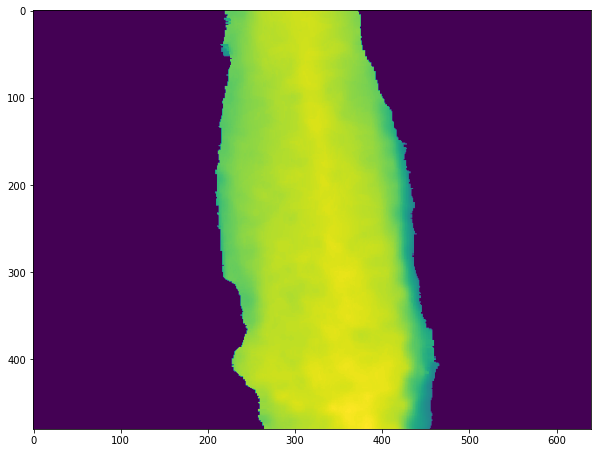

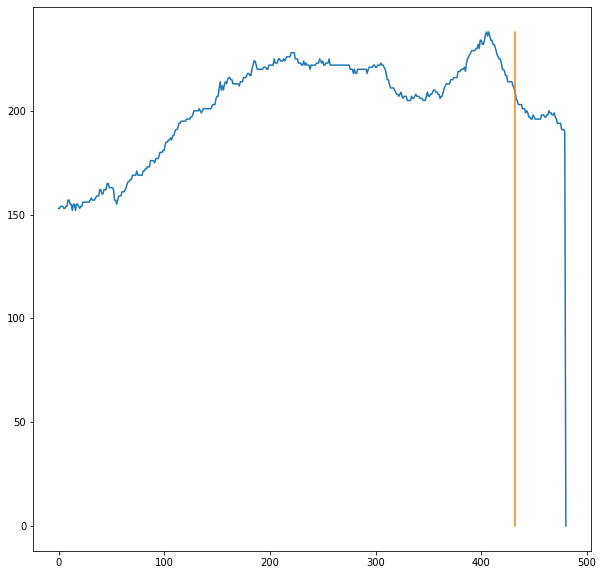

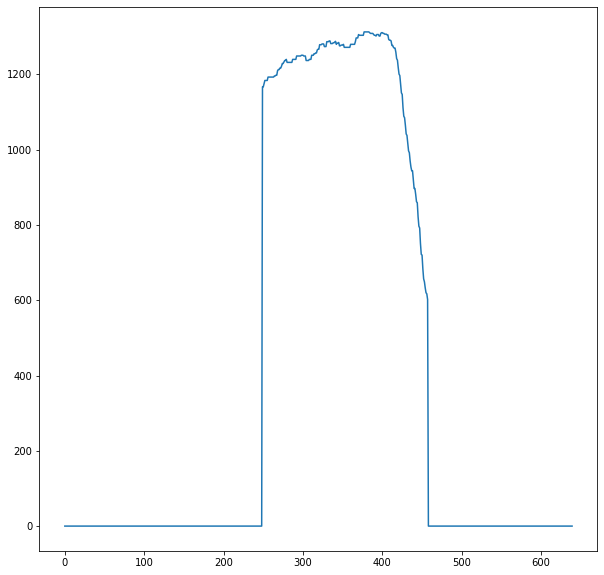

In [13]:
#Scanning the body to locate the hips

row_sums = np.sum(mask, axis=1)
if (len(row_sums)%2 == 0):
    row_sums = np.append(row_sums, 0, axis=None)
    

hip_loc = np.where(row_sums == int(np.median(row_sums)))
print((hip_loc))
if np.shape(hip_loc) != ():
    hip_loc = hip_loc[0][-1]
    

length_depth, width_depth = np.shape(masked_depth)


plt.figure(figsize=(10,10))
plt.imshow(masked_depth, cmap='gray')
masked_line = np.zeros(np.shape(mask))
masked_line[hip_loc, 0:width_depth] = np.max(mask)
plt.imshow(masked_line+masked_depth)


plt.figure(figsize=(10,10))
plt.plot(np.arange(0, len(row_sums)), row_sums)
plt.plot([hip_loc, hip_loc], [0, np.max(row_sums)])

plt.figure(figsize=(10,10))
plt.plot(masked_depth[hip_loc, 0:width_depth])


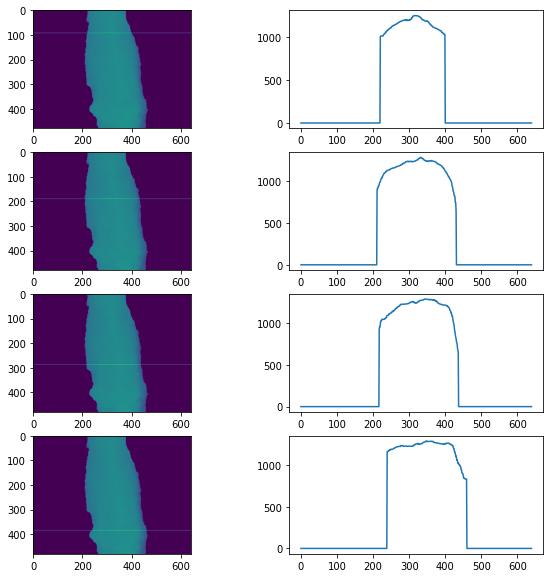

In [14]:
slice_vec = [int(length_depth/5), int(2*length_depth/5), int(3*length_depth/5), int(4*length_depth/5), length_depth]
j = 0
plt.figure(figsize=(10,10))
for i in range(1,9, 2):
    plt.subplot(4, 2, i)
    plt.imshow(masked_depth, cmap='gray')
    masked_line = np.zeros(np.shape(masked_depth))
    masked_line[slice_vec[j], 0:width_depth] = np.max(masked_depth)
    plt.imshow(masked_line+masked_depth)
    
    
    plt.subplot(4, 2, i+1)
    plt.plot(masked_depth[slice_vec[j], 0:width_depth])
    j+=1

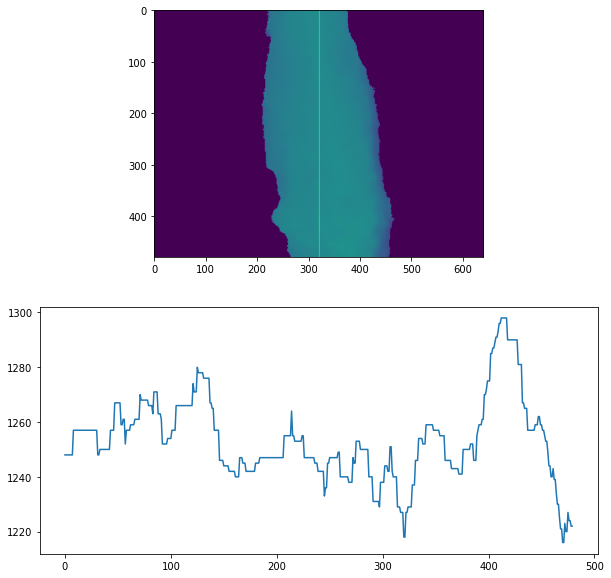

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
masked_line = np.zeros(np.shape(masked_depth))
masked_line[0:length_depth, int(width_depth/2)] = np.max(masked_depth)
plt.imshow(masked_line+masked_depth)

plt.subplot(2, 1, 2)
plt.plot(masked_depth[0:length_depth, int(width_depth/2)])

In [16]:
## Getting GLCM features
#from skimage.feature import graycomatrix, graycoprops
import skimage.feature.texture


def extract_texture_features(im, mask):
    im_1 = np.round((im/np.max(im))*31).astype(int)
    
    I_q_masked = im_1*np.where(mask >0 , 1, 0)


    G = skimage.feature.greycomatrix(I_q_masked,distances=(1,2,3,4),angles=(0,np.pi/4,np.pi/2,3*np.pi/4),levels=np.max(I_q_masked)+1,symmetric=True,normed=False)#[0:-1, 0:-1, ::, ::]
    G_temp = np.zeros(np.shape(G))
    for d in range(0,4):
        for t in range(0,4):
            G_temp[:,:,d,t]=G[:,:,d,t]/G[:,:,d,t].sum()


    contrast = skimage.feature.greycoprops(G_temp, prop='contrast')
    d0_contrast_mean = np.mean(contrast[0, ::])
    d1_contrast_mean = np.mean(contrast[1, ::])
    d2_contrast_mean = np.mean(contrast[2, ::])
    d3_contrast_mean = np.mean(contrast[3, ::])
  
    d0_contrast_std = np.std(contrast[0,::])
    d1_contrast_std = np.std(contrast[1,::])
    d2_contrast_std = np.std(contrast[2,::])
    d3_contrast_std = np.std(contrast[3,::])

    correlation = skimage.feature.greycoprops(G_temp, prop='correlation')
    d0_correlation_mean = np.mean(correlation[0, ::])
    d1_correlation_mean = np.mean(correlation[1, ::])
    d2_correlation_mean = np.mean(correlation[2, ::])
    d3_correlation_mean = np.mean(correlation[3, ::])
  
    d0_correlation_std = np.std(correlation[0,::])
    d1_correlation_std = np.std(correlation[1,::])
    d2_correlation_std = np.std(correlation[2,::])
    d3_correlation_std = np.std(correlation[3,::])

    homogeneity = skimage.feature.greycoprops(G_temp, prop='homogeneity')
    d0_homogeneity_mean = np.mean(homogeneity[0, ::])
    d1_homogeneity_mean = np.mean(homogeneity[1, ::])
    d2_homogeneity_mean = np.mean(homogeneity[2, ::])
    d3_homogeneity_mean = np.mean(homogeneity[3, ::])
  
    d0_homogeneity_std = np.std(homogeneity[0,::])
    d1_homogeneity_std = np.std(homogeneity[1,::])
    d2_homogeneity_std = np.std(homogeneity[2,::])
    d3_homogeneity_std = np.std(homogeneity[3,::])

    energy = skimage.feature.greycoprops(G_temp, prop='energy')
    d0_energy_mean = np.mean(energy[0, ::])
    d1_energy_mean = np.mean(energy[1, ::])
    d2_energy_mean = np.mean(energy[2, ::])
    d3_energy_mean = np.mean(energy[3, ::])
  
    d0_energy_std = np.std(energy[0,::])
    d1_energy_std = np.std(energy[1,::])
    d2_energy_std = np.std(energy[2,::])
    d3_energy_std = np.std(energy[3,::])


    f = [d0_contrast_mean, d1_contrast_mean, d2_contrast_mean, d3_contrast_mean, d0_contrast_std, d1_contrast_std, d2_contrast_std, d3_contrast_std,
       d0_correlation_mean, d1_correlation_mean, d2_correlation_mean, d3_correlation_mean, d0_correlation_std, d1_correlation_std, d2_correlation_std, d3_correlation_std,
       d0_homogeneity_mean, d1_homogeneity_mean, d2_homogeneity_mean, d3_homogeneity_mean, d0_homogeneity_std, d1_homogeneity_std, d2_homogeneity_std, d3_homogeneity_std,
       d0_energy_mean, d1_energy_mean, d2_energy_mean, d3_energy_mean, d0_energy_std, d1_energy_std, d2_energy_std, d3_energy_std]

    fnames = ['d0_contrast_mean', 'd1_contrast_mean', 'd2_contrast_mean', 'd3_contrast_mean', 'd0_contrast_std', 'd1_contrast_std', 'd2_contrast_std', 'd3_contrast_std',
       'd0_correlation_mean', 'd1_correlation_mean', 'd2_correlation_mean', 'd3_correlation_mean', 'd0_correlation_std', 'd1_correlation_std', 'd2_correlation_std', 'd3_correlation_std',
       'd0_homogeneity_mean', 'd1_homogeneity_mean', 'd2_homogeneity_mean', 'd3_homogeneity_mean', 'd0_homogeneity_std', 'd1_homogeneity_std', 'd2_homogeneity_std', 'd3_homogeneity_std',
       'd0_energy_mean', 'd1_energy_mean', 'd2_energy_mean', 'd3_energy_mean', 'd0_energy_std', 'd1_energy_std', 'd2_energy_std', 'd3_energy_std']
    return f, fnames


f, fnames = extract_texture_features(masked_depth, mask)
print(f, fnames)

[1.290247856504215, 1.763732337850541, 2.8794963695146034, 4.0699490040898745, 0.4125423417710595, 0.6269569355910626, 0.9962972546612651, 1.4400411567125804, 0.9959150605049827, 0.9944177225957264, 0.9908939487755863, 0.9871404615679586, 0.0013052865824947845, 0.0019815613653589048, 0.003145725289507284, 0.004542022040120943, 0.9818603882944807, 0.9756623649525716, 0.9616658286492568, 0.9488628264470408, 0.005765605584342123, 0.007595224487176691, 0.010901296215875631, 0.014368045406830423, 0.6915159564579905, 0.6904268630278821, 0.6879142639481068, 0.685492379668869, 0.0010136068604111928, 0.0013258550419581218, 0.0019816131807041753, 0.0027436139905465166] ['d0_contrast_mean', 'd1_contrast_mean', 'd2_contrast_mean', 'd3_contrast_mean', 'd0_contrast_std', 'd1_contrast_std', 'd2_contrast_std', 'd3_contrast_std', 'd0_correlation_mean', 'd1_correlation_mean', 'd2_correlation_mean', 'd3_correlation_mean', 'd0_correlation_std', 'd1_correlation_std', 'd2_correlation_std', 'd3_correlation_s

In [17]:
def make_X_train(category_filepath):
    category_temp = sorted(glob.glob(category_filepath))

    category = []
    for image in category_temp:
        if image.endswith('_D.tif'):
            category.append(image)
    
    image_train = category[0:int(len(category)*0.9)]
    X_train = np.zeros((int(len(image_train)), 83 ))
    y_train = []
    i = 0
    j = 0

    images_with_errors = []
    for images in range(int(len(image_train))):
        image_path = image_train[images]
        # BCS = int(int(image_path[len('BCS_sorted\0')])/2) #Replace the following two lines with the commented out one ot switch back to 0-9 mode
        # y_train.append(str(BCS))
        y_train.append(image_path[len('BCS_aligned_sorted_filtered\0')])
        
        
        try:
            depth_mask, mask = image_preprocessing(image_path)

            X_train[images, 0:10]= extract_boundary_features(mask)[0]
            X_train[images, 10:17]= extract_hu_moments(mask)[0]
            X_train[images, 17:28]= regionprops_features(mask)[0]
            X_train[images, 28:60]= extract_texture_features(depth_mask, mask)[0]
            X_train[images, 60:83]= extract_kernel_PCA(mask)[0]
            j+=1
            
        except (UnboundLocalError, ValueError, ZeroDivisionError):
            X_train[images, ::] = 0
            images_with_errors.append(image_path)
            i+=1
    print(i, ' images not used out of,', j, ', ', i/j*100, ' percent.')
    #print(images_with_errors)
    np.savetxt(f"images_with_errors\\{y_train[0]}_train.txt", np.asarray(images_with_errors), delimiter=',', fmt ='%s')
    return X_train, y_train


def make_X_test(category_filepath):
    category_temp = sorted(glob.glob(category_filepath))

    category = []
    for image in category_temp:
        if image.endswith('_D.tif'):
            category.append(image)

    image_test = category[int(len(category)*0.9):int(len(category))]
    X_test = np.zeros(( len(image_test), 83 ))
    y_test = []
    i = 0
    j = 0
    images_with_errors = []

    for images in range(len(image_test)):
        image_path = image_test[images]
        # BCS = int(int(image_path[len('BCS_sorted\0')])/2) #Replace the following two lines with the commented out one ot switch back to 0-9 mode
        # y_test.append(str(BCS))
        y_test.append(image_path[len('BCS_aligned_sorted_filtered\0')])

        try:
            depth_mask, mask = image_preprocessing(image_path)
            X_test[images, 0:10]= extract_boundary_features(mask)[0]
            X_test[images, 10:17]= extract_hu_moments(mask)[0]
            X_test[images, 17:28]= regionprops_features(mask)[0]
            X_test[images, 28:60]= extract_texture_features(depth_mask, mask)[0]
            X_test[images, 60:83]= extract_kernel_PCA(mask)[0]
            j+=1
        except (UnboundLocalError, ValueError, ZeroDivisionError):
            X_test[images, ::] = 0
            #print(image_path)
            i+=1
            images_with_errors.append(image_path)
    print(i, ' images not used out of ', j, ', ', i/j*100, ' percent.')
    #print(images_with_errors)
    np.savetxt(f"images_with_errors\\{y_test[0]}_test.txt", np.asarray(images_with_errors), delimiter=',', fmt ='%s')
    return X_test, y_test

In [18]:
def normalize_Xtrain(X_train):
    mn = []
    mx = []
    Xn_train = np.zeros(np.shape(X_train))
    X_norm = np.zeros(np.shape(X_train))
    for i in range(len(X_train[0, ::])):
        mn.append(np.min(X_train[::, i]))
        Xn_train[::, i] = X_train[::, i] - mn[i]
    for i in range(len(X_train[0, ::])):
        mx.append(np.max(Xn_train[::, i]))
        if mx[i] == 0:
            X_norm[::, i] = 0
        if mx[i] != 0:
            X_norm[::, i] = Xn_train[::, i]/mx[i]
            
    return X_norm, mx, mn

def normalize_Xtest(X_test, mx, mn):
    Xn_test = np.zeros(np.shape(X_test))
    X_norm = np.zeros(np.shape(Xn_test))
    for i in range(len(X_test[0, ::])):
        Xn_test[::, i] = X_test[::, i] - mn[i]
    for i in range(len(X_test[0, ::])):
        if mx[i] == 0:
            X_norm[::, i] = 0
        if mx[i] != 0:
            X_norm[::, i] = Xn_test[::, i]/mx[i]

    return X_norm

In [19]:
X_train2, y_train2 = make_X_train('BCS_aligned_sorted_filtered\\2\\*\\*') #originally not the filtered folder
X_test2, y_test2 = make_X_test('BCS_aligned_sorted_filtered\\2\\*\\*')

X_train3, y_train3 = make_X_train('BCS_aligned_sorted_filtered\\3\\*\\*')
X_test3, y_test3 = make_X_test('BCS_aligned_sorted_filtered\\3\\*\\*')

X_train4, y_train4 = make_X_train('BCS_aligned_sorted_filtered\\4\\*\\*')
X_test4, y_test4 = make_X_test('BCS_aligned_sorted_filtered\\4\\*\\*')

X_train5, y_train5 = make_X_train('BCS_aligned_sorted_filtered\\5\\*\\*')
X_test5, y_test5 = make_X_test('BCS_aligned_sorted_filtered\\5\\*\\*')

X_train6, y_train6 = make_X_train('BCS_aligned_sorted_filtered\\6\\*\\*')
X_test6, y_test6 = make_X_test('BCS_aligned_sorted_filtered\\6\\*\\*')

X_train = np.vstack((X_train2, X_train3, X_train4, X_train5, X_train6))
y_train = y_train2+y_train3+y_train4+y_train5+y_train6

X_test = np.vstack((X_test2, X_test3, X_test4, X_test5, X_test6))
y_test = y_test2+y_test3+y_test4+y_test5+y_test6

0  images not used out of, 674 ,  0.0  percent.
0  images not used out of  75 ,  0.0  percent.
0  images not used out of, 669 ,  0.0  percent.
0  images not used out of  75 ,  0.0  percent.
0  images not used out of, 2263 ,  0.0  percent.
0  images not used out of  252 ,  0.0  percent.
0  images not used out of, 1050 ,  0.0  percent.
0  images not used out of  117 ,  0.0  percent.
0  images not used out of, 135 ,  0.0  percent.
0  images not used out of  15 ,  0.0  percent.


In [20]:
print(np.shape(X_train))

bad_train_rows = []
for i in range(0, len(X_train)):
    if np.sum(X_train[i, :]) == 0:
        bad_train_rows.append(i)

bad_test_rows = []
for i in range(0, len(X_test)):
    if np.sum(X_test[i, :]) == 0:
        bad_test_rows.append(i)


print(f"{len(bad_train_rows)} rows to be deleted in X_train")
print(f"{len(bad_test_rows)} rows to be deleted in X_test")

X_train = np.delete(X_train, bad_train_rows, 0)
y_train = np.delete(y_train, bad_train_rows)


X_test = np.delete(X_test, bad_test_rows, 0)
y_test = np.delete(y_test, bad_test_rows)

Xn_train, mx, mn= normalize_Xtrain(X_train)
Xn_test = normalize_Xtest(X_test, mx, mn)

(4791, 83)
0 rows to be deleted in X_train
0 rows to be deleted in X_test


In [21]:
for i in range(0, len(X_train)):
    if np.sum(X_train[i, :]) == 0:
        print(i)

print(Xn_train[:, 0])
print(y_test[0:100:])

[0.81760101 0.81937279 0.81664874 ... 0.81548021 0.85635473 0.85525519]
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']


In [22]:
import sklearn.preprocessing

std_scale = sklearn.preprocessing.StandardScaler().fit(Xn_train)
std_Xn_train = std_scale.transform(Xn_train)
std_Xn_test = std_scale.transform(Xn_test)


new_features = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=10).fit(Xn_train, y_train)
#names = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=10).fit_transform(Xn_train, y_train).get_feature_names(input_features=None)
#print(Xn_train_new.shape)
#print(y_train.shape)

Xn_train_10 = new_features.transform(Xn_train)
Xn_test_10 = new_features.transform(Xn_test)
print(Xn_train_10.shape)
print(Xn_test_10.shape)

#Xn_test_new = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=10).transform(Xn_test)

(4791, 10)
(534, 10)


Text(0.5, 1.0, 'Principal Components of all BCS Classes')

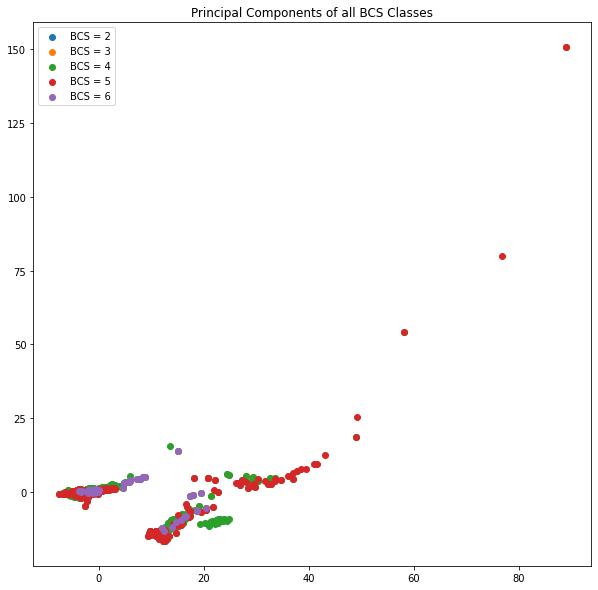

In [23]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components = 2)

# Xn_train2, mx, mn= normalize_Xtrain(X_train2)
# Xn_train3, mx, mn= normalize_Xtrain(X_train3)
# Xn_train4, mx, mn= normalize_Xtrain(X_train4)
# Xn_train5, mx, mn= normalize_Xtrain(X_train5)
# Xn_train6, mx, mn= normalize_Xtrain(X_train6)


# std_Xn_train2 = std_scale.transform(Xn_train2)
# std_Xn_train3 = std_scale.transform(Xn_train3)
# std_Xn_train4 = std_scale.transform(Xn_train4)
# std_Xn_train5 = std_scale.transform(Xn_train5)
# std_Xn_train6 = std_scale.transform(Xn_train6)


pca_std_Xn_train = pca.fit_transform(std_Xn_train)

#pca_total = pca.fit(std_Xn_train)
# pca_Xn_train2 = pca_total.transform(std_Xn_train2)
# pca_Xn_train3 = pca_total.transform(std_Xn_train3)
# pca_Xn_train4 = pca_total.transform(std_Xn_train4)
# pca_Xn_train5 = pca_total.transform(std_Xn_train5)
# pca_Xn_train6 = pca_total.transform(std_Xn_train6)

# print(np.shape(two_comp))

# plt.figure(figsize=(10,10))
# plt.scatter(two_comp[:, 0], two_comp[:, 1])
# plt.title('Principal Components of BCS Features')

y_train_2_slice = len(y_train[np.where(y_train == '2')])
y_train_3_slice = len(y_train[np.where(y_train == '3')])
y_train_4_slice = len(y_train[np.where(y_train == '4')])
y_train_5_slice = len(y_train[np.where(y_train == '5')])
y_train_6_slice = len(y_train[np.where(y_train == '6')])


# plt.figure(figsize=(10,10))
# plt.scatter(pca_Xn_train2[:,0], pca_Xn_train2[:,1])
# plt.scatter(pca_Xn_train3[:,0], pca_Xn_train3[:,1])
# plt.scatter(pca_Xn_train4[:,0], pca_Xn_train4[:,1])
# plt.scatter(pca_Xn_train5[:,0], pca_Xn_train5[:,1])
# plt.scatter(pca_Xn_train6[:,0], pca_Xn_train6[:,1])
# plt.legend(['BCS = 2', 'BCS = 3', 'BCS = 4', 'BCS = 5', 'BCS = 6'])
# plt.title('Principal Components of all BCS Classes')

plt.figure(figsize=(10,10))
plt.scatter(pca_std_Xn_train[:y_train_2_slice,0], pca_std_Xn_train[:y_train_2_slice,1])
plt.scatter(pca_std_Xn_train[y_train_2_slice:y_train_2_slice + y_train_3_slice,0], pca_std_Xn_train[y_train_2_slice:y_train_2_slice + y_train_3_slice,1])
plt.scatter(pca_std_Xn_train[y_train_3_slice:y_train_3_slice + y_train_4_slice,0], pca_std_Xn_train[y_train_3_slice:y_train_3_slice + y_train_4_slice,1])
plt.scatter(pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,0], pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,1])

# x = pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,0]
# y = pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,1]
# thing = np.arange(0, len(pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,1]))
# for i, txt in enumerate(np.arange(0, len(pca_std_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,1]))):
#     plt.annotate(txt, (x[i], y[i]))

plt.scatter(pca_std_Xn_train[y_train_5_slice:y_train_5_slice + y_train_6_slice,0], pca_std_Xn_train[y_train_5_slice:y_train_5_slice + y_train_6_slice,1])
plt.legend(['BCS = 2', 'BCS = 3', 'BCS = 4', 'BCS = 5', 'BCS = 6'])
plt.title('Principal Components of all BCS Classes')

# x_min = 4
# x_max = 10
# y_min = 10
# y_max = 35
# plt.axis([x_min, x_max, y_min, y_max])

Text(0.5, 1.0, 'Mask')

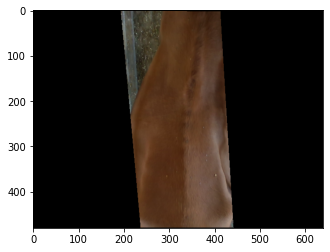

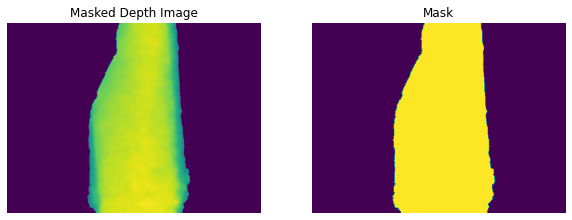

In [24]:
img_num = 401
filenames_temp = glob.glob('BCS_aligned_sorted\\5\\*\\*')

temp_mask = imageio.imread('masks\\big_mask.tiff')


filenames = []
filenames_rgb = []
for image in filenames_temp:
    if image.endswith('_D.tif'):
        filenames.append(image)
    if image.endswith('_C.tif'):
        filenames_rgb.append(image)

img = imageio.imread(filenames[img_num])
img_rgb = imageio.imread(filenames_rgb[img_num])

#test_img_name = 'BCS_sorted\\6\\Cow_18\\144'
# img = imageio.imread(test_img_name+'_D.tif')
# img_rgb = imageio.imread(test_img_name+'_C.tif')
# masked_depth, mask = image_preprocessing(test_img_name+'_D.tif')


masked_depth, mask = image_preprocessing(filenames[img_num])


plt.figure()
img_rgb[:, :, 0] = img_rgb[:, :, 0]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
img_rgb[:, :, 1] = img_rgb[:, :, 1]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
img_rgb[:, :, 2] = img_rgb[:, :, 2]*temp_mask[:, int((848-640)/2):int((848-(848-640)/2))]
plt.imshow(img_rgb)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(masked_depth)
plt.axis('off')
plt.title('Masked Depth Image')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Mask')

The accuracy is:  0.6292134831460674


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'SVM Accuracy')

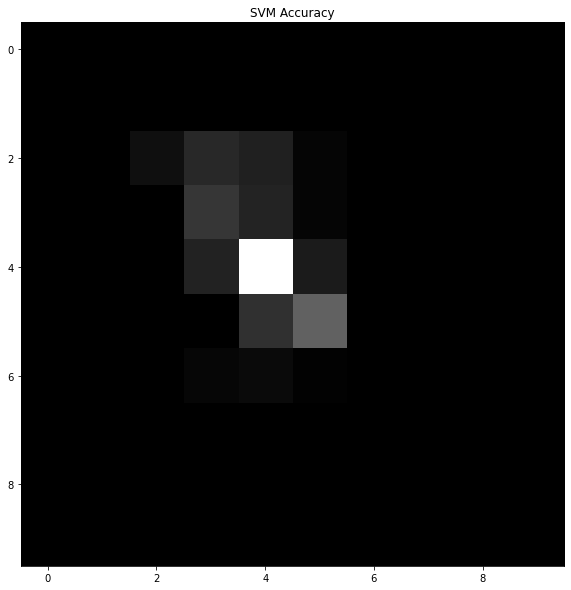

In [31]:
clf=sklearn.svm.SVC(kernel='rbf', gamma = 0.1, C=10, class_weight='balanced') #gamma = 0.15 C = 2 classes are balanced std_X_train is used
#clf.class_weight([2, 1, 1, 2])
clf.fit(std_Xn_train,y_train)
y_test_hat=clf.predict(std_Xn_test)
C = sklearn.metrics.confusion_matrix(y_test,y_test_hat,['0','1','2','3','4','5','6','7','8','9'])
acc=np.diag(C).sum().astype(float)/C.sum()

print('The accuracy is: ', acc)

plt.figure(figsize=(10,10))
plt.imshow(C, cmap='gray')
plt.title('SVM Accuracy')

In [32]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(C='rbf', class_weight='balanced'), param_grid=param_grid, n_jobs = 15, scoring='balanced_accuracy')
grid.fit(std_Xn_train,y_train)
#best parameters were gamm = 10 C = 10 for Xn_train and scoring = None (normal accuracy?)
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 1000.0, 'gamma': 0.01} with a score of 0.61


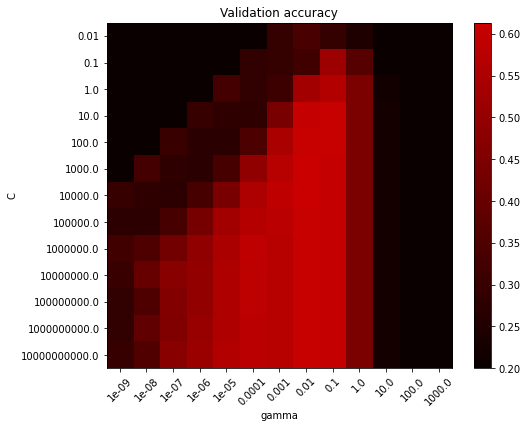

In [33]:
from matplotlib.colors import Normalize
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))



plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.cv_results_)



SVC(C=1000.0, class_weight='balanced', gamma=0.01)
0.6132444771555701
{'mean_fit_time': array([  2.29078827,   2.35220532,   2.29379077,   2.32061467,
         2.31861444,   2.31581697,   2.22665205,   2.18612523,
         2.15511994,   2.43922625,   2.89264107,   4.13302488,
         4.20732036,   2.16387262,   2.21156139,   2.3145195 ,
         2.56817698,   2.54877357,   2.43434696,   2.15251021,
         1.70259476,   1.17772303,   1.84441843,   2.69801145,
         3.98850179,   4.25704055,   2.2235394 ,   2.33460836,
         2.41794314,   2.35292854,   2.22472911,   2.10070925,
         1.70979218,   1.05043716,   0.60093427,   1.98164444,
         2.92957654,   4.1886734 ,   4.49000993,   2.28817477,
         2.31213112,   2.25695767,   2.07225533,   1.90121074,
         1.64143229,   1.12766809,   0.5780757 ,   0.41215482,
         1.87949615,   2.80729275,   4.20996222,   4.41115294,
         2.01252866,   2.08699312,   2.00342054,   1.91451683,
         1.64721193,   1.21352

TypeError: Input z must be 2D, not 1D

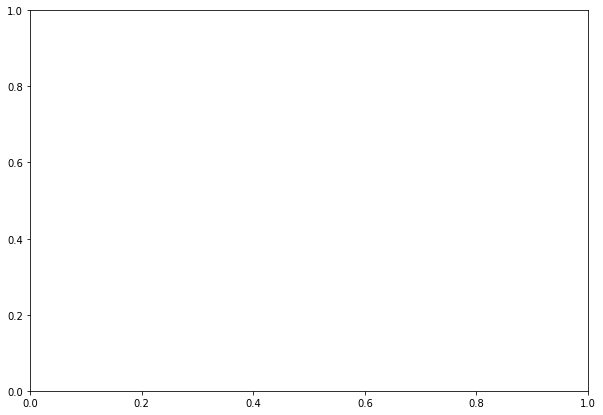

In [ ]:
plt.figure(figsize =(10, 7))
plt.contourf(std_Xn_test[:, 0], std_Xn_test[:, 1], y_test_hat.reshape(std_Xn_test[:, 0].shape), alpha = 0.1)
plt.scatter(std_Xn_test[:, 0], std_Xn_test[:, 1], c = y_test.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

Text(0.5, 1.0, 't-SNE of all BCS Classes')

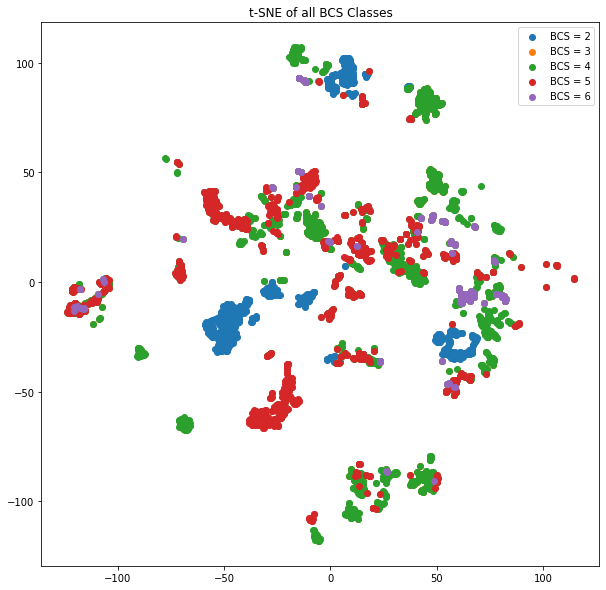

In [ ]:
import sklearn.manifold

t_sne = sklearn.manifold.TSNE(n_components=2, learning_rate=100, n_jobs=-1, perplexity = 30, early_exaggeration = 10, n_iter = 5000, n_iter_without_progress = 300)

t_sne_Xn_train = t_sne.fit_transform(Xn_train)

y_train_2_slice = len(y_train[np.where(y_train == '2')])
y_train_3_slice = len(y_train[np.where(y_train == '3')])
y_train_4_slice = len(y_train[np.where(y_train == '4')])
y_train_5_slice = len(y_train[np.where(y_train == '5')])
y_train_6_slice = len(y_train[np.where(y_train == '6')])

plt.figure(figsize=(10,10))
plt.scatter(t_sne_Xn_train[:y_train_2_slice,0], t_sne_Xn_train[:y_train_2_slice,1])
plt.scatter(t_sne_Xn_train[y_train_2_slice:y_train_2_slice + y_train_3_slice,0], t_sne_Xn_train[y_train_2_slice:y_train_2_slice + y_train_3_slice,1])
plt.scatter(t_sne_Xn_train[y_train_3_slice:y_train_3_slice + y_train_4_slice,0], t_sne_Xn_train[y_train_3_slice:y_train_3_slice + y_train_4_slice,1])
plt.scatter(t_sne_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,0], t_sne_Xn_train[y_train_4_slice:y_train_4_slice + y_train_5_slice,1])
plt.scatter(t_sne_Xn_train[y_train_5_slice:y_train_5_slice + y_train_6_slice,0], t_sne_Xn_train[y_train_5_slice:y_train_5_slice + y_train_6_slice,1])


plt.legend(['BCS = 2', 'BCS = 3', 'BCS = 4', 'BCS = 5', 'BCS = 6'])
plt.title('t-SNE of all BCS Classes')

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


The SVR score is:  0.2042891539577627


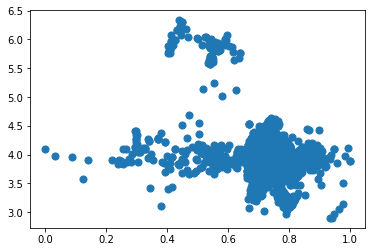

In [ ]:
# y_train_reg = []
# for i in range(len(y_train)):
#     if y_train[i] == '4_test':
#         y_train_reg.append(3)
#     if y_train[i] == 'usable':
#         y_train_reg.append(4)

# y_test_reg = []
# for i in range(len(y_test)):
#     if y_test[i] == '4_test':
#         y_test_reg.append(3)
#     if y_test[i] == 'usable':
#         y_test_reg.append(4)


svr = sklearn.svm.SVR(kernel='rbf')
svr.fit(std_Xn_train, y_train)
y_test_hat=svr.predict(std_Xn_test)
score = svr.score(std_Xn_test, y_test)
print('The SVR score is: ', score)

plt.figure()
plt.scatter(Xn_train[::, 0], svr.fit(Xn_train, y_train).predict(Xn_train), s = 50)